In [6]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import norm
import seaborn as sns
from scipy import stats
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
print("Library")

Library


In [7]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [8]:
import statsmodels.formula.api as smf
import os
os.getcwd()
os.chdir('C:/Users/asus1/Desktop/bootcamp/dersler/hafta3')
os.getcwd()
diabetes = pd.read_csv("diabetes.csv")
df=diabetes.copy()
df=df.dropna()
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
y=df["Outcome"]
X=df.drop(["Outcome"],axis=1)
X=pd.DataFrame(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30, random_state=42)

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
cart=DecisionTreeClassifier()
cart_model=cart.fit(X_train,y_train)
cart_model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [12]:
from skompiler import skompile
print(skompile(cart_model.predict).to("python/code"))

((((((0 if x[6] <= 0.671999990940094 else 1 if x[6] <= 0.6974999904632568 else
    0) if x[5] <= 31.40000057220459 else ((0 if x[3] <= 40.5 else 1) if x[1
    ] <= 111.5 else ((1 if x[1] <= 123.0 else 0) if x[5] <= 
    37.39999961853027 else 0) if x[2] <= 72.0 else 1) if x[4] <= 9.0 else (
    0 if x[6] <= 0.6395000219345093 else 1 if x[6] <= 0.6759999990463257 else
    0) if x[0] <= 4.5 else 1 if x[7] <= 26.5 else 0) if x[5] <= 
    49.10000038146973 else 1) if x[1] <= 127.5 else 1 if x[2] <= 56.0 else 
    (0 if x[7] <= 27.5 else 1 if x[0] <= 4.0 else 0) if x[5] <= 
    30.300000190734863 else 1 if x[5] <= 32.000000953674316 else ((0 if x[5
    ] <= 33.75 else 1) if x[0] <= 0.5 else 1 if x[5] <= 32.45000076293945 else
    0) if x[2] <= 85.0 else 1) if x[7] <= 28.5 else (1 if x[7] <= 29.5 else
    (1 if x[6] <= 0.4359999895095825 else 0) if x[5] <= 9.649999618530273 else
    0 if x[1] <= 133.0 else (1 if x[2] <= 74.0 else 0) if x[0] <= 5.0 else 
    0) if x[5] <= 26.949999809265137 e

In [13]:
x=[9]

In [14]:
((0 if x[0] <= 2.5 else 1) if x[0] <= 6.5 else 1 if x[0] <= 13.5 else 1)

1

In [15]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.70995670995671

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.72      0.76       151
           1       0.57      0.70      0.63        80

    accuracy                           0.71       231
   macro avg       0.69      0.71      0.69       231
weighted avg       0.73      0.71      0.72       231



In [17]:
?cart_model
#kaçlı alt gruplara böleyim bilgisini min_samples_split=2, verir

In [18]:
cart_grid = {"max_depth": range(1,10),
             "min_samples_split" : list(range(2,50))}

In [19]:
cart = tree.DecisionTreeClassifier()
#10 tane crossvalidation yap, cart için cart_gridleri kullan,n_jobs paralel işlem yap demek buna 1 verirsen paralel işlem yapmaz
cart_cv = GridSearchCV(cart, cart_grid, cv=10, n_jobs=-1, verbose=1)
cart_cv_model=cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 198 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 4098 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:   15.3s finished
C:\Users\asus1\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [20]:
print("En iyi paramatreler: " + str(cart_cv_model.best_params_)) #en iyilerini bul

En iyi paramatreler: {'max_depth': 5, 'min_samples_split': 19}


In [21]:
cart = tree.DecisionTreeClassifier(max_depth=5, min_samples_split=19)
cart_tuned=cart.fit(X_train, y_train)

In [22]:
y_pred=cart_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.7532467532467533

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       151
           1       0.67      0.57      0.62        80

    accuracy                           0.75       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231



In [24]:
#tek bir atış varsa random forest yap, bu çok daha iyi çalışır ama içerisine pek giremiyoruz.
#begging tekniği : küçük sampleler çekip buna bir tree kuruyor (bunları biz seçiyoruz), her birine farklı modeller kuruyorum
#random foresti hem sınıflandırma hem regresyoda kullanılır,
#kayıp veri tahmini(çünkü outlierlardan da öğrenme yapıyorum)
#diyelimki data setim dengeli değilse bile random forest bunların üstesinde gelir
#her ağacın max stepini filan aynı vermek zorundasın, parametreler farklı ama hepsi farklı bir datayla çalışıyor gibi düşünebiliriz






In [25]:
#Random forest
df=diabetes.copy()
df=df.dropna()
y=df["Outcome"]
X=df.drop(["Outcome"],axis=1)
X=pd.DataFrame(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30, random_state=42)



In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rf_model=RandomForestClassifier().fit(X_train,y_train)
##regressier olarak çağırcaktık eger kategorik olsaydı 

C:\Users\asus1\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [28]:
rf_model
#max_features='auto' her bir değişkne için kaç tane x kullansın

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
y_pred=rf_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7142857142857143

In [30]:
#Model tuning
?rf_model

In [31]:
rf_params= {"max_depth": [2,5,8,10],
           "max_features": [2,5,8],
           "n_estimators": [10,50,1000],
           "min_samples_split": [2,5,10]}

In [32]:
rf_model = RandomForestClassifier()
rf_cv_model=GridSearchCV(rf_model,rf_params,cv=10,n_jobs=-1,verbose=5)

In [33]:
rf_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 118 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:   32.4s
[Parallel(n_jobs=-1)]: Done 334 tasks      | elapsed:   52.7s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 694 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 928 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  3.6min finished
C:\Users\asus1\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [34]:
print("En iyi parametreler: " + str(rf_cv_model.best_params_))

En iyi parametreler: {'max_depth': 10, 'max_features': 8, 'min_samples_split': 2, 'n_estimators': 1000}


In [35]:
rf_tuned = RandomForestClassifier(max_depth = 8,
                                 max_features =8,
                                 min_samples_split=2,
                                 n_estimators=1000)
rf_tuned.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
y_pred=rf_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.7445887445887446

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.77      0.80       151
           1       0.62      0.69      0.65        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231



In [38]:
Importance = pd.DataFrame({"Importance":rf_tuned.feature_importances_*100}, index=X_train.columns)

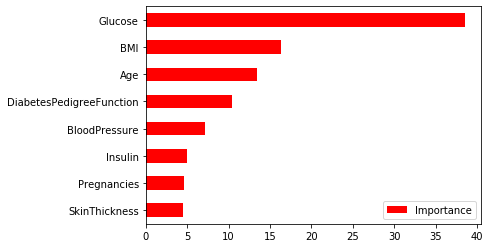

In [39]:
Importance.sort_values(by="Importance", axis=0, ascending=True).plot(kind="barh", color ='r')
plt.show()

In [40]:
Importance
#glucose, BMI ve age anlamlı çıkmış yalnızca 

,Importance
Pregnancies,4.614482
Glucose,38.523590
BloodPressure,7.138785
SkinThickness,4.491814
Insulin,5.013113
BMI,16.340451
DiabetesPedigreeFunction,10.452086
Age,13.425679


In [41]:
#### 22092019
import statsmodels.formula.api as smf
import os
os.getcwd()
os.chdir('C:/Users/asus1/Desktop/bootcamp/dersler/hafta3')
os.getcwd()
diabetes = pd.read_csv("diabetes.csv")
df=diabetes.copy()
df=df.dropna()
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [42]:
X = pd.DataFrame(X)
x_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 42)
print("fdv")

fdv


In [43]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [44]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

In [45]:
gbm_model


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [46]:
?gbm_model

In [47]:
gbm_params = {"learning_rate":[0.001,0.01,0.1,0.05],
             "n_estimators":[100,500,1000],
             "max_depth": [3,5,10],
             "min_samples_split":[2,5,10]}
gbm= GradientBoostingClassifier()


In [48]:
gbm_cv = GridSearchCV(gbm, gbm_params, cv=10, n_jobs = -1, verbose=5)
gbm_cv.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  6.4min finished
C:\Users\asus1\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_n...None,
                                                  presort='auto

In [49]:
print("En iyi paramaretmeler : " + str(gbm_cv.best_params_))

En iyi paramaretmeler : {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 500}


In [50]:
gbm=GradientBoostingClassifier(learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=500)
gbm_tuned=gbm.fit(X_train,y_train)


In [51]:
y_pred=gbm_tuned.predict(X_test)
accuracy_score(y_test,y_pred)


0.7489177489177489

In [52]:
print(classification_report(y_test,y_pred)) 

              precision    recall  f1-score   support

           0       0.82      0.79      0.81       151
           1       0.63      0.66      0.65        80

    accuracy                           0.75       231
   macro avg       0.72      0.73      0.73       231
weighted avg       0.75      0.75      0.75       231



In [54]:
###Xgboost

df=diabetes.copy()
df=df.dropna()
y=df["Outcome"]
X=df.drop(['Outcome'],axis=1)
x_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 42)

In [55]:
from xgboost import XGBClassifier

In [56]:
##kurduk modeli
xgb_model=XGBClassifier().fit(X_train,y_train)

In [57]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [58]:
y_pred=xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7489177489177489

In [59]:
##defaultta gelenler
print(classification_report(y_test,y_pred)) 

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       151
           1       0.62      0.70      0.66        80

    accuracy                           0.75       231
   macro avg       0.73      0.74      0.73       231
weighted avg       0.76      0.75      0.75       231



In [ ]:
?xgb_model

In [62]:
xgb_params = {"n_estimators":[100,500,1000],
              'subsample':[0.6,0.8,1.0],
             "max_depth": [3,4,5,6],
             "learning_rate":[0.1,0.01,0.2,0.05],
             "min_samples_split":[2,5,10]}
##n_estimators kaç tane tree kuracağı

In [73]:
xgb=XGBClassifier()
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv=10, n_jobs = -1, verbose=2)


In [74]:
xgb_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   54.7s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 17.8min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 24.1min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 31.3min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 38.6min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 46.9min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed: 55.8min finished
C:\Users\asus1\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.2, 0.05],
                         'max_depth': [3, 4, 5, 6],
                         'min_samples_split': [2, 

In [ ]:
#print("En iyi paramaretmeler : " + str(xgb_cv_model.best_params_))
xgb_cv_model.best_params_

In [ ]:
xgb=XGBClassifier(learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100,subsample=1)
xgb_tuned=xgb.fit(X_train,y_train)

In [ ]:
y_pred=xgb_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

In [ ]:
print(classification_report(y_test,y_pred)) 

In [ ]:
### LGBM 

df=diabetes.copy()
df=df.dropna()
y=df["Outcome"]
X=df.drop(['Outcome'],axis=1)
x_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 42)

In [ ]:
#!conda install -c conda-forge lightgbm
from lightgbm import LGBMClassifier

In [ ]:
lgbm_model

In [ ]:
lgbm_model = LGBMClassifier().fit(X_train,y_train)
y_pred=lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

In [ ]:
## MODEL TUNING

In [ ]:
?lgbm_model

In [ ]:
lgbm_params = {"n_estimators":[100,500,1000],
              'subsample':[0.6,0.8,1.0],
             "max_depth": [3,4,5],
             "learning_rate":[0.1,0.01,0.2,0.05],
             "min_child_samples":[10,20]}

In [ ]:
lgbm = LGBMClassifier()

lgbm_cv_model = GridSearchCV(lgbm, lgbm_params,cv=10,n_jobs=-1,verbose=2)

In [ ]:
lgbm_cv_model.best_params_

In [ ]:
lgbm=LGBMClassifier(learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100,subsample=1)
lgbm_tuned=lgbm.fit(X_train,y_train)

In [ ]:
y_pred=lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

In [ ]:
### CATBOOSTLA YAPALIM 
df=diabetes.copy()
df=df.dropna()
y=df["Outcome"]
X=df.drop(['Outcome'],axis=1)
x_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 42)


In [ ]:
#!pip install catboost
from catboost import CatBoostClassifier
#boostinglerin en hızlısı


In [ ]:
cat_model = CatBoostClassifier().fit(X_train,y_train)
y_pred=cat_model.predict(X_test)
accuracy_score(y_test, y_pred)

In [ ]:
?cat_model

In [ ]:
#MODEL TUNING

catb_params = { 'iterations' : [200,500],
              'learning_rate': [0.01, 0.05, 0.1],
              'depth' : [3,5,8]}

In [ ]:
catb = CatBoostClassifier()
catb_cv_model=GridSearchCV(catb, catb_params,cv=5,n_jobs=-1,verbose=2)

In [ ]:
catb_cv_model.best_params_

In [ ]:
catb=CatBoostClassifier(iterations= 200,learning_rate=0.01, depth=3)
catb_tuned=catb.fit(X_train,y_train)
y_pred=catb_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

YAPAY SİNİR AĞLARI 

In [ ]:
df=diabetes.copy()
df=df.dropna()
y=df["Outcome"]
X=df.drop(['Outcome'],axis=1)
x_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 42)
